# **Capstone project: Providing data-driven suggestions for Salifort Motors HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page [summary](https://docs.google.com/presentation/d/1bdJE_ErhrTySCiGTgpAS-TD9Rs-j_FWYg51PX_DPkYg/edit?usp=sharing&resourcekey=0-ghqcaAkRFeS23YosCCquGA) of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



* [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
* [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)



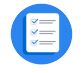

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Insights after completing the initial EDA planning stage:**
1. The stakeholders for this project is the HR department at Salifort Motors 
2. The company is trying to understand what factors are contributing to an employee leaving in the hope to address this and encourage employees to stay at the company
3. Initial observations are
    - the available data should suffice to gain insights into employee satisfaction and churn
    - there are outliers in the tenure column that need to be dealt with (model depending)
    - there are numeric columns that need to be formatted as categorical columns
4. Nothing yet
5. No ethical concerns at this point other than needing to ensure that the data sample is representative of the entire employee population currently at the company

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [384]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column', None)

### Load dataset

The dataset is located in the same folder as this notebook (i.e., in the current working directory on Coursera), and is called **`HR_capstone_dataset.csv`.** You can read in this data directly from Coursera without having to download it.

In [385]:
# Load dataset into a dataframe
df0 = pd.read_csv('data/HR_capstone_dataset.csv')

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [386]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [387]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [388]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [389]:
# Rename columns as needed
df1 = df0.rename(columns={'Work_accident': 'work_accident', 'average_montly_hours': 'ave_monthly_hrs',
                          'time_spend_company': 'tenure', 'Department': 'department'})

# Display all column names after the update
df1.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'ave_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [390]:
# Check for missing values
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
ave_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [391]:
# Check for duplicates
duplicates = df1.duplicated().sum()

# Percentage of duplicated data
percentage = df1.duplicated().sum() / df1.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

3008 rows contain duplicates amounting to 20.05% of the total data.


In [392]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,ave_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [393]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df2 = df1.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df2.head()


,satisfaction_level,last_evaluation,number_project,ave_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

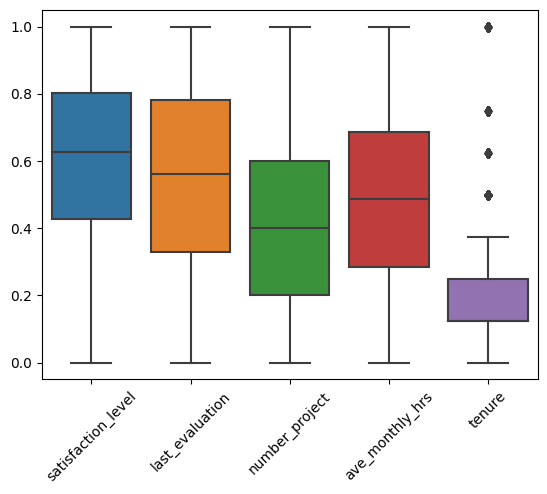

In [394]:
# Create a boxplot to visualize distribution of `satisfaction_level` `last_evaluation` `number_project` `ave_monthly_hrs` `tenure` and detect any outliers

# going to plot 1 boxplot for all variables so first need to normalize
from sklearn.preprocessing import MinMaxScaler

# select numeric columns
num_columns = df2[['satisfaction_level', 'last_evaluation', 'number_project', 'ave_monthly_hrs', 'tenure']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()


In [395]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df2['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df2['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df2[(df2['tenure'] > upper_limit) | (df2['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

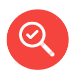
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [396]:
df2.head()

,satisfaction_level,last_evaluation,number_project,ave_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [397]:
df2.describe(include='all')

,satisfaction_level,last_evaluation,number_project,ave_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**Project goal:** To predict whether an employee is going to leave the company therefore any data which could be related to this would be good to explore. 

Any of the variables could theoretically have an impact on whether an employee is likely to leave or not or need to look for relationships and patterns between them and what needs to be predicted which is whether an employee will leave or not.
- The variable that we are trying to predict for is `left` 

Visualisations plan: 
1. search for patterns between `left` and the other variables 
    - Scatter plots for numeric variables
        - `satisfaction_level` ~ `last_evaluation` 
        - `satisfaction_level` ~ `ave_monthly_hrs`
        - `last_evaluation` ~ `ave_monthly_hrs`
    - Histograms for categories
        - `work_accident`, `promotions_last_5years`, `department`, `salary`

2. check correlations 
    - assuming a correlation between `ave_monthly_hrs` and `number_projects` so confirm this
    - also assuming a correlation between `satisfaction_level` and `left`

3. would be good to check if there is an imbalance in the ratio of employees who `left` based on `department` which could reveal issues within a specific department

4. what is the `ave_monthly_hrs` mean and how does ths relate to standard mean working time as this could have an impact on employee happiness

5. according to `last_evaluation` what is the balance between well and poorly evaluated employees who left



### Scatter plots to interpret relationships between the continuous variables

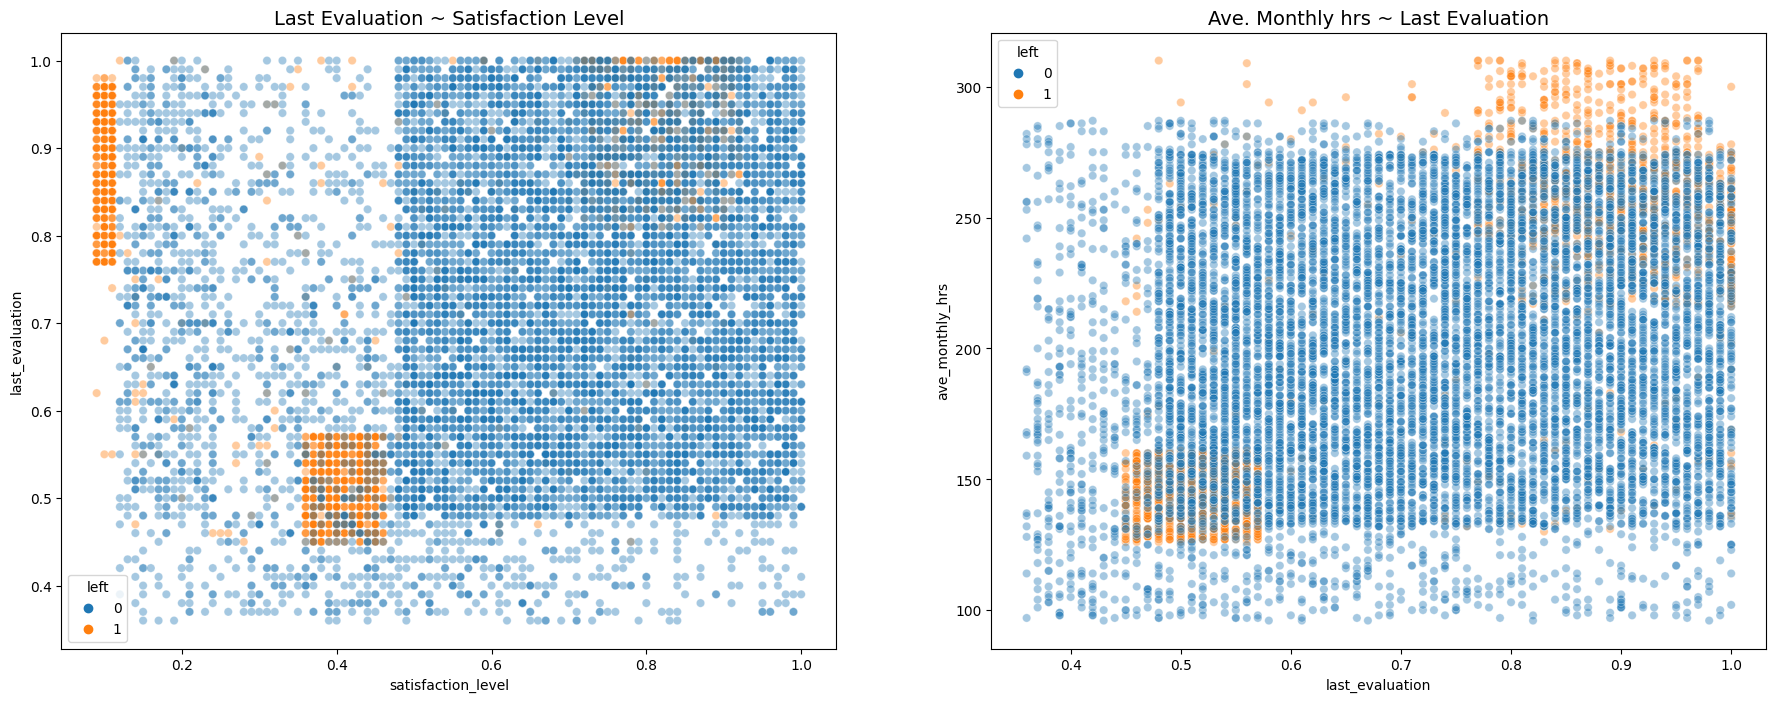

In [398]:
# scatter plot of satisfaction ~ left
fig, ax = plt.subplots(1, 2, figsize= (22,8))

sns.scatterplot(
    data=df2, 
    x='satisfaction_level', 
    y='last_evaluation',
    hue='left', 
    alpha= 0.4,
    ax= ax[0]
)
ax[0].set_title('Last Evaluation ~ Satisfaction Level', fontsize='14')

sns.scatterplot(
    data=df2, 
    x='last_evaluation', 
    y='ave_monthly_hrs',
    hue='left', 
    alpha= 0.4,
    ax= ax[1]
)
ax[1].set_title('Ave. Monthly hrs ~ Last Evaluation', fontsize='14');

**Insights:** 
- There is a strange pattern in the data in the form of 2 distinct blocks of data points which looks like data manipulation/made-up data
- There is a group of very unsatisfied employees who were all very well evaluated that left
- There is a group of high ave_monthly_hrs employees who were well evaluated that left
- There is also a group of what is still unclear in terms of classification that left. This group was what looks like fairly ave. in terms of evaluation, satisfaction and working hours.

**Next Steps:** These variables warrant further exploration
- `ave_monthly_hrs` in the 300 range = a clear group of employees that left
- don't know what to do with the blocks of `left` data groupings

### Histograms to interpret relationships within categories
- `number_project, tenure, work_accident, promotion_last_5years, department, salary`

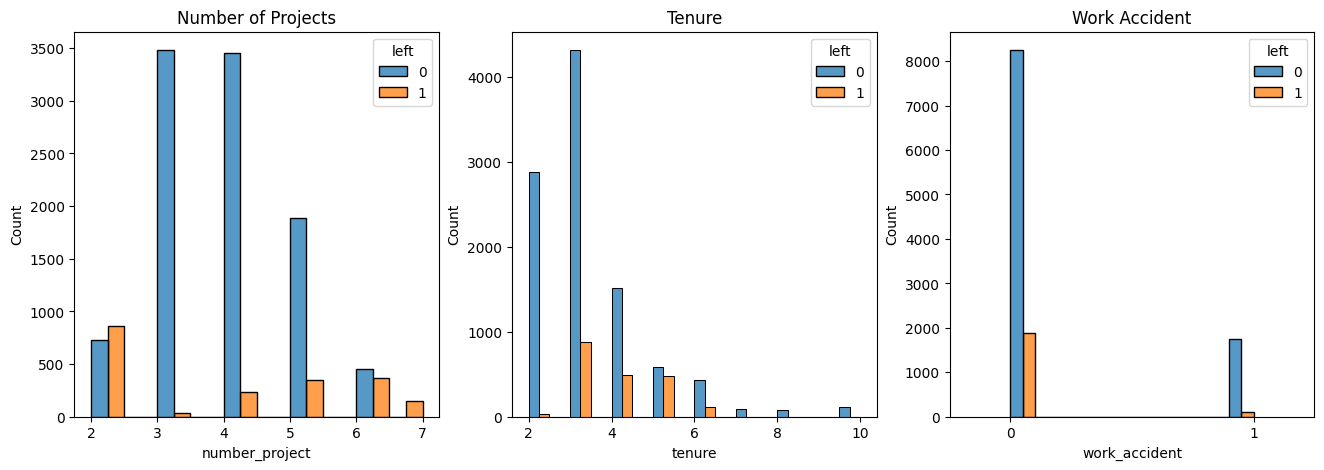

In [399]:

# plot the first 3 charts number_project, tenure, work_accident,
fig, ax = plt.subplots(1,3, figsize=(16,5))
binwidth = 0.5

sns.histplot(
    data=df2,
    x= 'number_project',
    hue='left',
    multiple='dodge',
    ax= ax[0],
    binwidth= binwidth
)
ax[0].set_title('Number of Projects') 

sns.histplot(
    data=df2,
    x= 'tenure',
    hue='left',
    multiple='dodge',
    ax= ax[1],
    binwidth= binwidth
)
ax[1].set_title('Tenure') 

sns.histplot(
    data=df2,
    x= 'work_accident',
    hue='left',
    bins= ['0','1'],
    multiple='dodge',
    ax= ax[2],
    binwidth= 0.1
)
ax[2].set_title('Work Accident') 
ax[2].set_xticks([0, 1])  # Set the x-axis ticks with an offset
ax[2].set_xticklabels(['0', '1'])  # Set the x-axis tick labels
ax[2].set_xlim(-0.25, 1.25)  # Adjust x-axis limits

plt.show()

**Insights:** 

| Chart | Insights |
| --- | --- | 
| 1. No of projects | Employees with 2, 6 and 7 projects had a disproportionate number of people who left <br> all employees with 7 projects left | 
| 2. Tenure | no employees who were with the company for more the 6 years left the company |
| 3. Work accident | The balance here is similar so looks like work_accident is not a contributing factor to whether or not employees leave |

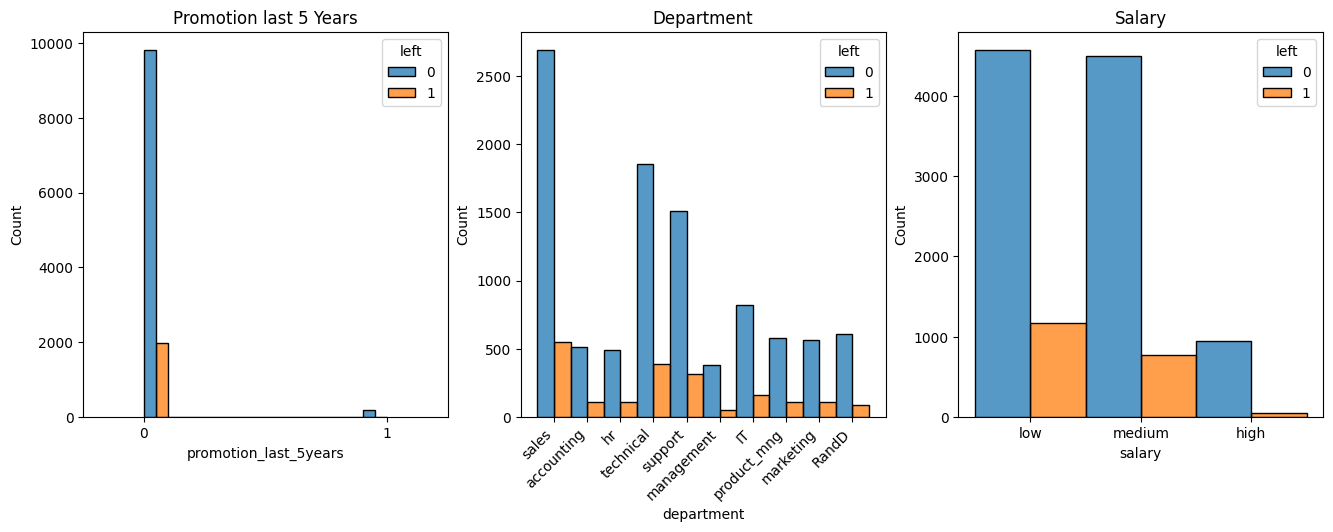

In [400]:
# plot the other variables promotion_last_5years, department, salary

fig, ax = plt.subplots(1,3, figsize=(16,5))
binwidth = 0.5

sns.histplot(
    data=df2,
    x= 'promotion_last_5years',
    hue='left',
    multiple='dodge',
    ax= ax[0],
    binwidth= 0.1
)
ax[0].set_title('Promotion last 5 Years') 
ax[0].set_xticks([0, 1])  # Set the x-axis ticks with an offset
ax[0].set_xticklabels(['0', '1'])  # Set the x-axis tick labels
ax[0].set_xlim(-0.25, 1.25)  # Adjust x-axis limits

sns.histplot(
    data=df2,
    x= 'department',
    hue='left',
    multiple='dodge',
    ax= ax[1],
    binwidth= binwidth
)
ax[1].set_title('Department') 
ax[1].set_xticks(range(len(df2['department'].unique())))  # Set the x-axis ticks positions
ax[1].set_xticklabels(df2['department'].unique(), rotation=45, ha='right')  # Set the x-axis tick labels


sns.histplot(
    data=df2,
    x= 'salary',
    hue='left',
    bins= ['0','1'],
    multiple='dodge',
    ax= ax[2],
    binwidth= 0.1
)
ax[2].set_title('Salary') 

plt.show()

**Insights:** 

| Chart | Insights |
| --- | --- | 
| 1. Promotion last 5 yrs | Nothing interesting here. <br> Scale makes it hard to see but nothing obvious so not worth further inquiry |
| 2. Department | Looks normal across departments |
| 3. Salary | Nothing interesting in terms of this variable |

**Next Steps:** Based on the histogram plots the variables to explore further are `number_projects` and `tenure`

### Boxplots for further investigation

**Variables of interest**: These variables seem to be having the greatest impact on whether employees are leaving or not
- `ave_montly_hrs`
- `number_projects`
- `tenure`

**Additional Info**

US - Average work hours in a month: 
- While one month can have between 19 and 22 workdays depending on the calendar and length, one month of work is about four weeks.
- 40 hours/week x average 4 workweeks/month = 160 work hours/month

https://www.theforage.com/blog/basics/how-many-work-hours-year


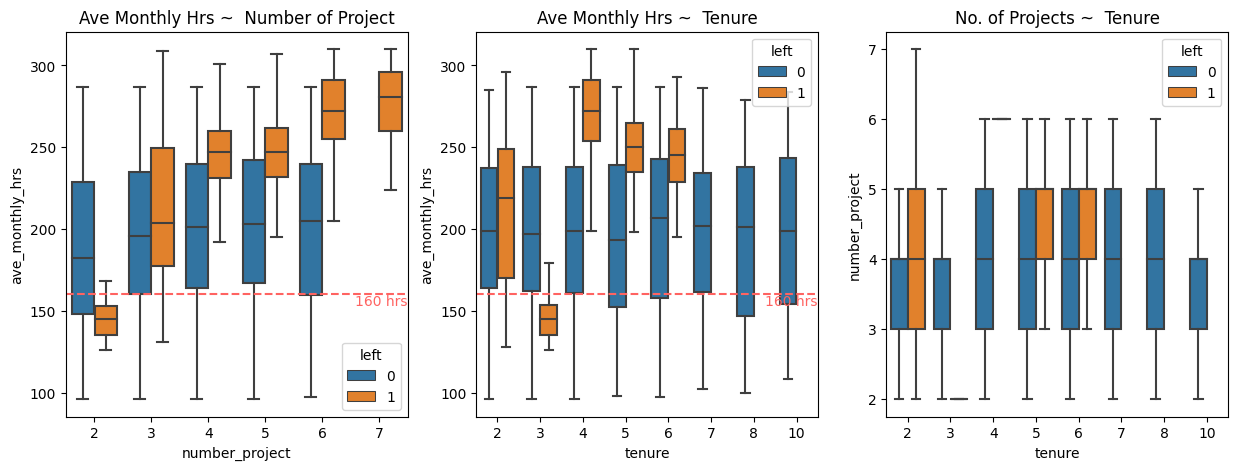

In [401]:
# create boxplots of the above variables
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(
    data= df2,
    y= 'ave_monthly_hrs',
    x= 'number_project',
    hue= 'left',
    showfliers= False,
    ax= ax[0]
)
ax[0].set_title('Ave Monthly Hrs ~  Number of Project')
ax[0].axhline(y=160, color='#ff6361', label='160hrs/month', ls='--')
ax[0].text(x=ax[0].get_xlim()[1], s='160 hrs', y=160, color='#ff6361', ha='right', va='top')

sns.boxplot(
    data= df2,
    y= 'ave_monthly_hrs',
    x= 'tenure',
    hue= 'left',
    showfliers= False,
    ax= ax[1]
)
ax[1].set_title('Ave Monthly Hrs ~  Tenure')
ax[1].axhline(y=160, color='#ff6361', label='160hrs/month', ls='--')
ax[1].text(x=ax[1].get_xlim()[1], s='160 hrs', y=160, color='#ff6361', ha='right', va='top')

sns.boxplot(
    data= df2,
    y= 'number_project',
    x= 'tenure',
    hue= 'left',
    showfliers= False,
    ax= ax[2]
)
ax[2].set_title('No. of Projects ~  Tenure')

plt.show()

**Insights:** 

| Chart | Insights |
| --- | --- | 
| 1. Ave Monthly Hrs ~  Number of Projects | It is clear from this chart that the mean working hours is well above the general standard of 160hrs/month <br> this is indicating poor management and policy at the company and should be addressed. <br> Confirmation that all employees who had 7 projects left and that people are being overworked. <br> There is a contingency of employees who worked less than the 160hr standard and who left. <br> it is unclear as to whether these employees left or were terminated. |  
| 2. Ave Monthly Hrs ~  Tenure | No employees who have been with the company for 7 or more years have left. <br> The employees who worked the below average hours and left had all been with the company for 3 years. This could be something to explore further to understand what happened there. <br> The most evenly distributed group of monthly hours and people who left are employees who have been with the company for 2 years. <br> The mean ave_monthly_hrs is even across the board. |
| 3. No. of Projects ~  Tenure | Nothing noteworthy in terms of this plot. Not a good visualisation as the variables are discrete rather than continuous | 

**Next Steps:** 

- This information would be important to share with company stakeholders as employees being overworked is something than can be addressed and could help the company significantly reduce employee churn
- Look into the 3 year tenure group that left. This could require additional data or stakeholder engagement
- Plot a correlation heatmap to assess variable correlations and prepare for model construction

### Correlation heatmap 

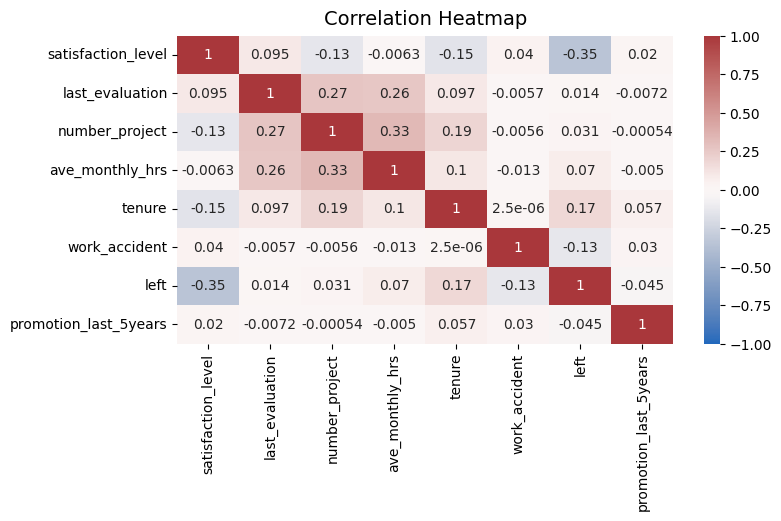

In [402]:
# Plot a correlation heatmap
plt.figure(figsize=(8, 4))

heatmap = sns.heatmap(
    data= df2.select_dtypes(include='number').corr(), 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap=sns.color_palette("vlag", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=8);

**Insights:** 

| Chart | Insights |
| --- | --- | 
| 1. Correlation Heatmap | There is a clear negative correlation between `satisfaction_level` and `left` <br> Also a positive correlation between `ave_montly_hrs` and `number_projects` |

**Next Steps:** 



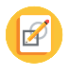
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

**Answer:** This is a binary classification task. The model needs to predict a yes or no regarding whether an employee will leave the company or not. 

### Identify the types of models most appropriate for this task.

**Answer:** the most appropriate models for this task are classification models such as a binomial logistic regression model or a decision tree based model ensemble like a random forest or gradient boost model.

For this project all 3 models will be constructed in order to compare and find the best performing solution.

### Modeling Approach A: Binomial Logistic Regression


In [403]:
# imports for modelling and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [404]:
# check for variables that need to be converted
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   ave_monthly_hrs        11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### Convert categorical variables to numeric

In [405]:
# create list of columns that need to be encoded
columns_to_encode = ['department', 'salary']

# instantiate new df from the encoded df
df3 = pd.get_dummies(df2, columns=columns_to_encode, drop_first=True)
df3 = df3.convert_dtypes(convert_boolean=False)

df3.head()

,satisfaction_level,last_evaluation,number_project,ave_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.8,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [406]:
df3.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
ave_monthly_hrs           0
tenure                    0
work_accident             0
left                      0
promotion_last_5years     0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
salary_low                0
salary_medium             0
dtype: int64

#### Check Class imbalance


In [407]:
# check the class balance for the target variable
class_balance = df3['left'].value_counts() / df3.shape[0]
class_balance

left
0    0.833959
1    0.166041
Name: count, dtype: Float64

- Fairly significant class imbalance so this could be impacting performance of the model.

In [408]:
# To upsample data use the resample() function from the sklearn.utils module.

from sklearn.utils import resample

# Separate your data into majority and minority classes
majority_data = df3[df3['left'] == 0]  # majority class
minority_data = df3[df3['left'] == 1]  # minority class

# Upsample the minority class
upsampled_minority = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)

# Combine the upsampled minority class with the majority class
df4 = pd.concat([majority_data, upsampled_minority])

# Check the class distribution of the upsampled data
df4['left'].value_counts()

left
0    10000
1    10000
Name: count, dtype: Int64

#### Outlier Investigation

- `tenure` the the variable with outliers so this will be inspected

In [409]:
# Determine the number of rows containing outliers for each variable that needs to be addressed

# Compute the 25th percentile value in `X_n`
percentile25 = df4['tenure'].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = df4['tenure'].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = df4[(df4['tenure'] > upper_limit) | (df4['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 1266


There are a number of outliers and the first approach will be to reassign them using floor and ceiling method

In [410]:
# create a copy of the df before working on outliers
df5 = df4.copy()

# Calculate 10th percentile
tenth_percentile = np.percentile(df5['tenure'], 10)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(df5['tenure'], 90)


In [411]:

# Apply lambda function to replace outliers with thresholds defined above
df5['tenure'] = df5['tenure'].apply(lambda x: (
    tenth_percentile if x < tenth_percentile 
    else ninetieth_percentile if x > ninetieth_percentile 
    else x))


In [412]:

# sns.boxplot(df5['tenure'])

#### Create the training, validation and test data

**Isolate Target and Predictor Variables**

Variable that we are trying to predict for is whether an employee left or not

In [413]:
# Separate the dataset into labels (y) and features (X).
y = df5['left']

X = df5.copy()
X = X.drop('left', axis = 1)

In [414]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify= y, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.30, stratify= y_train, random_state = 0)

#### Construct the model

In [415]:
# Fit a LogisticRegression model to the training data
clf = LogisticRegression(max_iter=1000).fit(X_train,y_train)


In [416]:

# Obtain parameter estimates
clf.coef_


array([[-4.82354758e+00,  6.67003195e-01, -5.58345705e-01,
         3.20668507e-03,  1.22591140e+00, -1.35060043e+00,
        -1.07454457e+00, -1.89549447e-01,  3.54307369e-02,
         1.91464801e-02, -7.28507303e-02,  1.37438401e-01,
        -8.66109231e-02,  6.88570907e-02,  4.21987479e-02,
         7.78393822e-02,  1.80866576e+00,  1.41800565e+00]])

In [417]:

# retrieve the intercept term of the logistic regression model
clf.intercept_

array([-2.12229974])

#### Model Results

In [418]:
# Predict the target variable for the validation set:
y_pred = clf.predict(X_val)

In [419]:
# Predict the probability estimates for each class in the validation set:
y_val_pred_proba = clf.predict_proba(X_val)

In [429]:
# Evaluate the model using various metrics on the validation set:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_val, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_val, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_val, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_val, y_pred))
print("AUC Score:", "%.6f" %  metrics.roc_auc_score(y_val, y_pred))

Accuracy: 0.831190
Precision: 0.800432
Recall: 0.882381
F1 Score: 0.839411
AUC Score: 0.831190


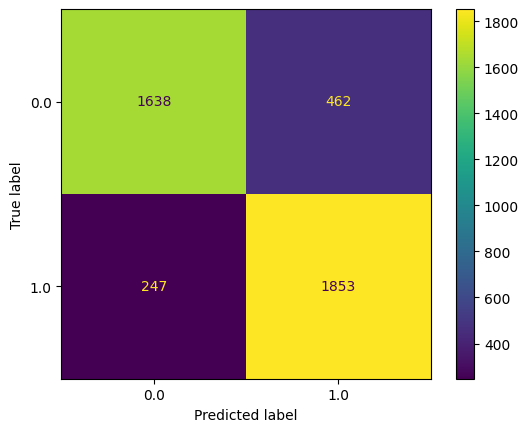

In [421]:
# Produce a confusion matrix
cm = metrics.confusion_matrix(y_val, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

#### Model Evaluation

The original results from this model were no good. 
- The accuracy of the model was good but the precision and recall scores are not good at all so there may be a class imbalance
- The tenure outliers were not dealt with and this could be impacting the model performance

After dealing with the class imbalance and reassigning the tenure outliers according to the floor and ceiling method the performance has been significantly improved


#### Linearity Check
`not sure what to do here. I don't know how to read the resulting pair plot`

In [422]:
# scatter plot to check linear relationship
# sns.pairplot(df5)

#### Multicollinearity check
`cannot get the VIF calculation to work`

In [423]:
# # Calculate the variance inflation factor

# # Import variance_inflation_factor from statsmodels.
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # # Create a subset of the data with the continuous independent variables. 
# # X = ols_data[['X_1','X_2']]

# # Calculate the variance inflation factor for each variable.
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # Create a DataFrame with the VIF results for the column names in X.
# df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# # Display the VIF results.
# df_vif

#### Check for extreme outliers
`not getting this to work either` the result does not look correct

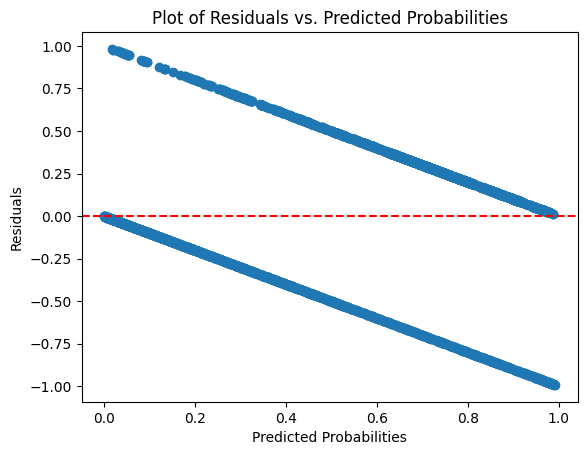

In [427]:
# Obtain the standardized residuals for each observation
residuals = y_val - y_val_pred_proba[:, 1]

# Create a plot of the standardized residuals against the predicted values
plt.scatter(y_val_pred_proba[:, 1], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')
plt.title('Plot of Residuals vs. Predicted Probabilities')
plt.show()

# Look for any points that fall outside the range of +/- 2 or +/- 3 for the standardized residuals. These points may be considered as potential outliers.
# If potential outliers found, investigate them further to determine whether they are genuine outliers or data errors. You may want to remove them from the analysis if they are confirmed as outliers.

---
### Modeling Approach B: Random Forest


---
### Modeling Approach C: Gradient Boosting


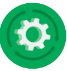
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]